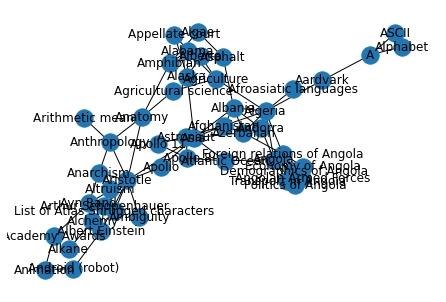

In [1]:
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

x = 100
conn = sqlite3.connect('wiki_1000_conn.db')
cursor = conn.cursor()
cursor.execute("SELECT topic FROM links where id < ?",(x,))
rows = cursor.fetchall()

for row in rows:
    G.add_node(row[0].replace("Wikipedia: ", ""))

for i in range(1, x):
    # Startknoten
    cursor.execute("SELECT conn FROM conn where id = ?", (i,))
    connetcions = cursor.fetchone()
    conns = str(connetcions)
    c = conns.replace("('", "").replace("')", "").replace("_", " ").split("/wiki/")

    nodes = list(G.nodes)
    for conn in c:
        if conn in nodes and not conn == nodes[i-1]:
            G.add_edge(nodes[i - 1], conn)

to_be_removed = [x for x in G.nodes() if G.degree(x) <= 1]

for x in to_be_removed:
    G.remove_node(x)

nx.draw(G, with_labels=True)

plt.show()

Graph for first 1000 entries